# Coffee raitings
For my work I will use this dataset: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md 

One day I went to some coffee shop and asked for some brewed coffee and there were 2 different types of coffee: Peru & Ethiopia. I asked barista which one should I choose, if I don't like coffee with high level of acidity and he answered me with one interesting statement: "the higher, the more acidic". I understood it as "the closer coffeee's otigin to the equator the more acidity will be in the cofeee. So I'd like to check it using this dataset. 

In order to do this I am going to show on map the mean level of acidity of each coffee region.

## Observing the data
[see dataset](#dataset)

In [43]:
import pandas as pd 
from matplotlib import pyplot as plt

In [44]:
data = pd.read_csv('coffee_ratings.csv')

In [45]:
data.head()

total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 company       altitude  ...  color  \
0      metad agricultural developmet plc      1950-2200  ...  Green   
1      metad agricultural developmet plc      1950-2200  ...  Green   
2                                    NaN  1600 - 1800 m  ...    NaN   
3  yidnekachew debessa coffee plantation      1800-2200  ...  Green   
4      metad agricultural developmet plc      1950-2200  ...  Green   

  category_two_defects        expiration                  certification_body  \
0                    0   April 3rd, 2016  METAD Agricultural Development plc   
1                    1   April 3rd, 2016  METAD Agricultural Development plc   
2                    0    May 31st, 2011        Specialty Coffee Association   
3                    2  March 25th, 2016  METAD Agricultural Development plc   
4                    2   April 3rd, 2016  METAD Agricultural Development plc   

                      certification_address  \
0  309fcf77415a3661ae83e027f7e5f05dad786e44   
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  36d0d00a3724338ba7937c52a378d085f2172daa   
3  309fcf77415a3661ae83e027f7e5f05dad786e44   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      certification_contact unit_of_measurement  \
0  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
3  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters altitude_mean_meters  
0              1950.0               2200.0               2075.0  
1              1950.0               2200.0               2075.0  
2              1600.0               1800.0               1700.0  
3              1800.0               2200.0               2000.0  
4              1950.0               2200.0               2075.0  

[5 rows x 43 columns]

In [46]:
data['acidity'].describe()

count    1339.000000
mean        7.535706
std         0.379827
min         0.000000
25%         7.330000
50%         7.580000
75%         7.750000
max         8.750000
Name: acidity, dtype: float64

In [47]:
data.drop(data[data['acidity'] == 0].index, inplace=True)

As soon as we are interested in "country_of_origin" and "acidity" let's look closely at those column

In [48]:
import plotly.io as pio
pio.renderers.default = 'notebook'
# pio.renderers.default = 'browser'

<a id='dataset'></a>

In [49]:
country = data['country_of_origin']
score = data['acidity']

plot_data = [dict(
    type = 'scatter', 
    x = country, 
    y = score, 
    mode = 'markers', 
    transforms = [dict(
        type = 'groupby', 
        groups = country,)])]

fig_dict =dict(data=plot_data, layout={'title': {'text': 'Coffee acidity'}})
pio.show(fig_dict, validate=False)

_(Here we already see that there will be some problems with some countries' names, because they don't look universal and we need them to match some kind of notation that we will have in our geojson file. So we should consider it later and somehow rename those countries)_

Without a [map](#map) it is really hard to say if our hypothesis is right or not. But if we look at the countrie from my story and compare them we will see that thet perfectly match barista's theory: Peru is lower than Ethiopia and also has lower acidity score.

In [50]:
countries = data['country_of_origin'].value_counts()

## Geojson

For our vizualization purposes we need a file in .geojson format. However I couldn't find geojson for the whole world AND with US states (we need them because in dataset we have states individually - Hawaii and Puerto Rico). So I took .geojson file for the whole world from https://geojson-maps.ash.ms/ and combined it with another file that has info about USA states https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json

In [51]:
import json

In [52]:
with open('world.geojson', 'r') as f:
    wmap = json.load(f)

In [53]:
world = []
for i in range(len(wmap['features'])):
    world.append(wmap['features'][i]['properties']['name'])

Let's compare contries' names in our geojson file and in our dataset:

In [54]:
found = set(world) & set(countries.index)
notfound = set(countries.index) - set(world)
notfound

{'Cote d?Ivoire',
 'Laos',
 'Mauritius',
 'Tanzania, United Republic Of',
 'United States (Hawaii)',
 'United States (Puerto Rico)'}

So these are the countries which names doesn't match in these 2 files:

In [55]:
namemapping = {'Cote d?Ivoire': 'CГґte d\'Ivoire', 
               'Laos': 'Lao PDR', 
               'Mauritius': 'Madagascar',
               'Tanzania, United Republic Of': 'Tanzania',
               'United States (Hawaii)': 'Hawaii',
               'United States (Puerto Rico)': 'Puerto Rico'}

_P.S. I couldn't find Mauritius geojson file, so I replaced it with madagascar ( as soon as they have the same latitude)_

In [56]:
data['country_of_origin'] = data['country_of_origin'].apply(lambda x: namemapping[x] if (x in namemapping) else x)

In [57]:
countries = data['country_of_origin'].value_counts()
notfound = set(countries.index) - set(world)
notfound

set()

## Agregating the data

In [59]:
acidity = data.groupby(by=['country_of_origin'])['acidity'].median()

In [60]:
acidity_data = pd.DataFrame({'name': acidity.index, 'acidity': acidity.values})

## Hypothesis vizualization

### Acidity and country

In [62]:
import plotly.express as px

<a id='map'></a>

In [84]:
fig = px.choropleth(acidity_data, locations='name', geojson=wmap, featureidkey='properties.name', color='acidity')
fig.show()

So as we can see barista was partly right: if we look only at Africa the acidity depends on the closeness to the equator. However it is not true for other continents.

### Acidity and [species of coffee bean](#boxplot)

If you ask yandex what are the differences between robusta and arabica it will say that "arabica has more acidity, while robusta is more bitter" 

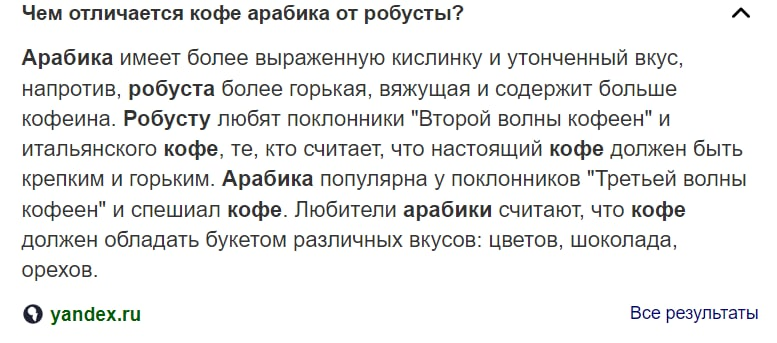

So let's check this too

In [65]:
arabica = data[data['species'] == 'Arabica']
robusta = data[data['species'] == 'Robusta']

In [69]:
import numpy as np

In [88]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(
    x=robusta['acidity'],
    y=np.full(robusta.shape[0], 'Robusta'),
    name='Robusta', 
    marker_color='#fba239'))

fig.add_trace(go.Box(
    x=arabica['acidity'],
    y=np.full(arabica.shape[0], 'Arabica'),
    name='Arabica', 
    marker_color='#7c06a6'))

fig.update_traces(orientation='h')
fig.update_layout(title_text='Acidity of coffee species')
fig.update_xaxes(title_text='Acidity')
print()

<a id='boxplot'></a>

In [89]:
fig.show()

## Other

This figure shows absolutely the same data as the previous one, but first one for me seems to be more readable, while the second one just looks prettier.

In [90]:
import plotly.figure_factory as ff

group_labels = ['Arabica', 'Robusta']

colors = ['#7c06a6', '#fba239']

fig = ff.create_distplot([arabica['acidity'], robusta['acidity']], group_labels, bin_size=.1, show_rug=False, colors=colors)

fig.update_layout(title_text='Acidity of coffee species')
fig.update_xaxes(title_text='Acidity')
fig.show()